In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, os.path
import re

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

from PIL import Image

from google.colab import drive, files

In [0]:
drive.mount('/content/drive')
DIR = 'drive/My Drive/nn/_1/_savings'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## functions 

In [0]:
# testing nn model

def createNet(neuronsL1, neuronsL2, neuronsL3, innerActivation, outputActivation):
    model = Sequential()
    model.add(
        Dense(
            neuronsL1, 
            input_dim=784, 
            activation=innerActivation
            )
        )

    if (neuronsL2 > 0):
        model.add(Dense(neuronsL2, activation=innerActivation))

    if (neuronsL3 > 0):
        model.add(Dense(neuronsL3, activation=innerActivation))
    
    model.add(Dense(10, activation=outputActivation))

    model.compile(
        loss='categorical_crossentropy', 
        optimizer='adam', 
        metrics=['accuracy']
    )

    return model

def testModel(net, batch_size, epochs, iterations, name, valid_spl=0.2, verb=0):
    acc = []

    for i in range(iterations):
        model = createNet(net[0], net[1], net[2], net[3], net[4])
        history = model.fit(
            x_train, y_train, 
            batch_size=batch_size, 
            epochs=epochs, 
            verbose=verb, 
            validation_split=valid_spl
        )

        acc.append(history.history['val_acc'][-1])

        # model.save(f'/content/drive/My Drive/nn/_1/_savings/{name}.h5')
        np.savetxt(f'/content/drive/My Drive/nn/_1/_savings/{name}.csv', acc)
  
    return acc

# supplementary function for 
def my_rpl(i):
    i = i.replace("'", "")
    i = i.replace("[", "")
    i = i.replace("]", "")

    return i

# fit the model
def fitModel(x_train, y_train, x_test, y_test, net, 
             batch_size, epochs, name, verb=1, to_plot=True):
    
    model = createNet(net[0], net[1], net[2], net[3], net[4])
    history = model.fit(
        x_train, y_train, 
        batch_size=batch_size, 
        epochs=epochs, 
        validation_data=(x_test, y_test),
        verbose=verb, 
    )

    model.save(f'/content/drive/My Drive/nn/_1/_savings/{name}.h5')

    if to_plot==True:
        plt.figure(figsize=(11,5))
        plt.plot(history.history['acc'], label='accuracy score @ train')
        plt.plot(history.history['val_acc'], label='accuracy score @ validation')
        plt.xlabel('epoch')
        plt.ylabel('accuracy')
        plt.legend()
        plt.show()

    return model

## data upload 

In [0]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


## data analysis

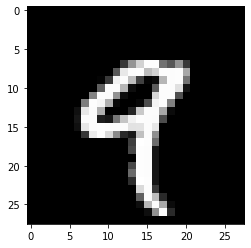

In [0]:
n = 4
plt.imshow(Image.fromarray(x_train_org[n]).convert("RGBA"))
plt.show()

## preprocessing

In [0]:
# reshape to be processed by the nn
print(x_train_org.shape)
print(x_test_org.shape)
print(x_train_org[n].shape)
x_train = x_train_org.reshape(60000, 28*28)
x_test = x_test_org.reshape(10000, 28*28)

(60000, 28, 28)
(10000, 28, 28)
(28, 28)


In [0]:
# data normalization 
x_train = x_train.astype('float32')
x_train = x_train / 255
x_test = x_test.astype('float32')
x_test = x_test / 255 

In [0]:
# converting labels to one hot encoding
print(set(y_train_org))
print(y_train_org[0])

y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

print(y_train[0])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## build, fit & predict

In [0]:
model = Sequential()

model.add(Dense(800, input_dim=784, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

print(model.summary())

model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=30,
    verbose=1,
    validation_split=0.2
)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               628000    
_________________________________________________________________
dense_1 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None
Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 3s 57us/sample - loss: 0.2333 - acc: 0.9303 - val_loss: 0.1046 - val_acc: 0.9677
Epoch 2/30
48000/48000 [==============================] - 2s 41us/sample - loss: 0.0833 - acc: 0.9744 - v

In [0]:
# saving & loading

# model.save('mnist_dense.h5')
# files.download('mnist_dense.h5')

# model.save('/content/drive/My Drive/nn/_1/mnist_dense.h5')
model = load_model('/content/drive/My Drive/nn/_1/mnist_dense.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


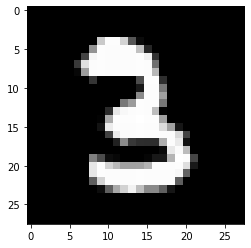

In [0]:
n_recognize = 1779

plt.imshow(Image.fromarray(x_test_org[n_recognize]).convert('RGBA'))
plt.show()

In [0]:
x = x_test[n_recognize]
print(x.ndim)
x = np.expand_dims(x, axis=0)
print(x.ndim)

1
2


In [0]:
prediction = model.predict(x)
prediction = np.argmax(prediction)
print(prediction)
print(y_test_org[n_recognize])

3
3


## testing prediction

In [0]:
files.upload()

Saving test_mnist.bmp to test_mnist.bmp


{'test_mnist.bmp': b'BM>a\x01\x00\x00\x00\x00\x006\x00\x00\x00(\x00\x00\x00\xbe\x00\x00\x00\x9e\x00\x00\x00\x01\x00\x18\x00\x00\x00\x00\x00\x08a\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff

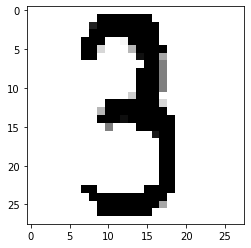

In [0]:
img = image.load_img(
    'test_mnist.bmp',
    target_size=(28,28),
    color_mode='grayscale'
)

plt.imshow(img.convert('RGBA'))
plt.show()

In [0]:
# converting image to array
x = image.img_to_array(img)
x = x.reshape(1, 784)
x = 255 - x # inverting image to white on black
x /= 255 # normalizing array

In [0]:
prediction = model.predict(x)
print(np.argmax(prediction))

3


## testing multiple models

In [0]:
acc = testModel([800,0,0,'relu','softmax'], 200, 10, 3)
print(acc)

[0.97891665]


accuracy @ all model runs:  [0.9789]
average accuracy:  0.9789
deviation magnitude :  0.0
deviation standard deviation:  0.0


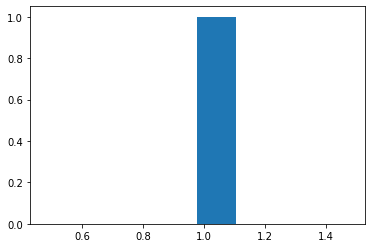

In [0]:
print('accuracy @ all model runs: ', [round(a,4) for a in acc])
print('average accuracy: ', round(sum(acc)/len(acc), 4))
print('deviation magnitude : ', round(max(acc) - min(acc), 4))
print('deviation standard deviation: ', round(np.array(acc).std(),6))

plt.hist(acc, 8)
plt.show()

In [0]:
net = []
net.append([800, 0, 0, 'relu', 'softmax'])
net.append([400, 0, 0, 'relu', 'softmax'])
net.append([400, 400, 0, 'relu', 'softmax'])
net.append([800, 0, 0, 'linear', 'softmax'])
net.append([800, 0, 0, 'relu', 'sigmoid'])

for currNet in net:
    acc = testModel(currNet, 200, 10, 3)
    print(currNet, round(sum(acc)/len(acc), 4))

[800, 0, 0, 'relu', 'softmax'] 0.9798
[400, 0, 0, 'relu', 'softmax'] 0.9775
[400, 400, 0, 'relu', 'softmax'] 0.9793
[800, 0, 0, 'linear', 'softmax'] 0.9242
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
[800, 0, 0, 'relu', 'sigmoid'] 0.0995


In [0]:
acc1 = testModel([10,0,0,'relu','softmax'], 200, 10, 3)
acc2 = testModel([100,0,0,'relu','softmax'], 200, 10, 3)
acc3 = testModel([5000,0,0,'relu','softmax'], 200, 10, 3)
acc4 = testModel([25000,0,0,'relu','softmax'], 200, 10, 3)

print(f'10 neurons: {sum(acc1)/len(acc1)}\n',
      f'100 neurons {sum(acc2)/len(acc2)}\n',
      f'5000 neurons {sum(acc3)/len(acc3)}\n',
      f'25000 neurons {sum(acc4)/len(acc4)}')

10 neurons: 0.9292500019073486
 100 neurons 0.9708333611488342
 5000 neurons 0.9738333225250244
 25000 neurons 0.9792500138282776


In [0]:
acc1 = testModel([10,0,0,'linear','softmax'], 200, 10, 3)
acc2 = testModel([100,0,0,'linear','softmax'], 200, 10, 3)
acc3 = testModel([5000,0,0,'linear','softmax'], 200, 10, 3)

print(f'10 neurons: {sum(acc1)/len(acc1)}\n',
      f'100 neurons {sum(acc2)/len(acc2)},\n',
      f'5000 neurons {sum(acc3)/len(acc3)}')

10 neurons: 0.9253333210945129
 100 neurons 0.9239166378974915,
 5000 neurons 0.9191666841506958


In [0]:
acc1 = testModel([10,0,0,'relu','softmax'], 200, 10, 3, 0.1)
acc2 = testModel([100,0,0,'relu','softmax'], 200, 10, 3, 0.1)
acc3 = testModel([5000,0,0,'relu','softmax'], 200, 10, 3, 0.1)

print(f'10 neurons: {sum(acc1)/len(acc1)}\n',
      f'100 neurons {sum(acc2)/len(acc2)},\n',
      f'5000 neurons {sum(acc3)/len(acc3)}')

10 neurons: 0.9409999847412109
 100 neurons 0.9766666889190674,
 5000 neurons 0.9828333258628845


In [0]:
acc1 = testModel([100,0,0,'relu','softmax'], 1, 10, 3, 0.1)
acc2 = testModel([100,0,0,'relu','softmax'], 10, 10, 3, 0.1)
acc3 = testModel([100,0,0,'relu','softmax'], 100, 10, 3, 0.1)
acc4 = testModel([100,0,0,'relu','softmax'], 1000, 10, 3, 0.1)

print(f'batchsize = 1: {sum(acc1)/len(acc1)}\n',
      f'batchsize = 10: {sum(acc2)/len(acc2)}\n',
      f'batchsize = 100: {sum(acc3)/len(acc3)}\n',
      f'batchsize = 1000: {sum(acc4)/len(acc4)}\n')

batchsize = 1: 0.9743333458900452
 batchsize = 10: 0.9775000214576721
 batchsize = 100: 0.9779999852180481
 batchsize = 1000: 0.968999981880188



In [0]:
# testing various number of neurons
acc1 = testModel([64,0,0,'relu','softmax'], 64, 10, 3, 1)
acc2 = testModel([1024,0,0,'relu','softmax'], 64, 10, 3, 2)
acc3 = testModel([2048,0,0,'relu','softmax'], 64, 10, 3, 3)
acc4 = testModel([4096,0,0,'relu','softmax'], 64, 10, 3, 4)

# testing various hidden layers
acc5 = testModel([1024,0,0,'relu','softmax'], 64, 10, 3, 5)
acc6 = testModel([1024,1024,0,'relu','softmax'], 64, 10, 3, 6)
acc7 = testModel([1024,1024,1024,'relu','softmax'], 64, 10, 3, 7)

# testing various batchsizes
acc8 = testModel([2048,0,0,'relu','softmax'], 64, 10, 3, 8)
acc9 = testModel([2048,0,0,'relu','softmax'], 256, 10, 3, 9)
acc10 = testModel([2048,0,0,'relu','softmax'], 1024, 10, 3, 10)
acc11 = testModel([2048,0,0,'relu','softmax'], 2048, 10, 3, 11)
acc12 = testModel([2048,0,0,'relu','softmax'], 4096, 10, 3, 12)

# testing various epochs number
acc13 = testModel([2048,0,0,'relu','softmax'], 64, 32, 3, 13)
acc14 = testModel([2048,0,0,'relu','softmax'], 64, 64, 3, 14)
acc15 = testModel([2048,0,0,'relu','softmax'], 64, 256, 3, 15)
acc16 = testModel([2048,0,0,'relu','softmax'], 64, 512, 3, 16)
acc17 = testModel([2048,0,0,'relu','softmax'], 64, 1024, 3, 17)
acc18 = testModel([2048,0,0,'relu','softmax'], 64, 2048, 3, 18)

# testing various inner activation functions
acc19 = testModel([2048,0,0,'relu','softmax'], 64, 256, 3, 19)
acc20 = testModel([2048,0,0,'selu','softmax'], 64, 256, 3, 20)
acc21 = testModel([2048,0,0,'elu','softmax'], 64, 256, 3, 21)
acc22 = testModel([2048,0,0,'tanh','softmax'], 64, 256, 3, 22)
acc23 = testModel([2048,0,0,'softmax','softmax'], 64, 256, 3, 23)
acc24 = testModel([2048,0,0,'softsign','softmax'], 64, 256, 3, 24)
acc25 = testModel([2048,0,0,'sigmoid','softmax'], 64, 256, 3, 25)
acc26 = testModel([2048,0,0,'hard_sigmoid','softmax'], 64, 256, 3, 26)
acc27 = testModel([2048,0,0,'exponential','softmax'], 64, 256, 3, 27)
acc28 = testModel([2048,0,0,'linear','softmax'], 64, 256, 3, 28)

# testing various output activation functions
acc29 = testModel([2048,0,0,'relu','relu'], 64, 256, 3, 29)
acc30 = testModel([2048,0,0,'relu','selu'], 64, 256, 3, 30)
acc31 = testModel([2048,0,0,'relu','elu'], 64, 256, 3, 31)
acc32 = testModel([2048,0,0,'relu','tanh'], 64, 256, 3, 32)
acc33 = testModel([2048,0,0,'relu','softsign'], 64, 256, 3, 33)
acc34 = testModel([2048,0,0,'relu','sigmoid'], 64, 256, 3, 34)
acc35 = testModel([2048,0,0,'relu','hard_sigmoid'], 64, 256, 3, 35)
acc36 = testModel([2048,0,0,'relu','exponential'], 64, 256, 3, 36)
acc37 = testModel([2048,0,0,'relu','linear'], 64, 256, 3, 37)

# testing random parameters
acc38 = testModel([2048,1024,512,'relu','softmax'], 64, 256, 3, 38)
acc39 = testModel([512,1024,2048,'relu','softmax'], 64, 256, 3, 39)
acc40 = testModel([256,512,1024,'relu','softmax'], 64, 256, 3, 40)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
acc1_ = "testModel([64,0,0,'relu','softmax'], 64, 10, 3, 1)"
acc2_ = "testModel([1024,0,0,'relu','softmax'], 64, 10, 3, 2)"
acc3_ = "testModel([2048,0,0,'relu','softmax'], 64, 10, 3, 3)"
acc4_ = "testModel([4096,0,0,'relu','softmax'], 64, 10, 3, 4)"
acc5_ = "testModel([1024,0,0,'relu','softmax'], 64, 10, 3, 5)"
acc6_ = "testModel([1024,1024,0,'relu','softmax'], 64, 10, 3, 6)"
acc7_ = "testModel([1024,1024,1024,'relu','softmax'], 64, 10, 3, 7)"
acc8_ = "testModel([2048,0,0,'relu','softmax'], 64, 10, 3, 8)"
acc9_ = "testModel([2048,0,0,'relu','softmax'], 256, 10, 3, 9)"
acc10_ = "testModel([2048,0,0,'relu','softmax'], 1024, 10, 3, 10)"
acc11_ = "testModel([2048,0,0,'relu','softmax'], 2048, 10, 3, 11)"
acc12_ = "testModel([2048,0,0,'relu','softmax'], 4096, 10, 3, 12)"
acc13_ = "testModel([2048,0,0,'relu','softmax'], 64, 32, 3, 13)"
acc14_ = "testModel([2048,0,0,'relu','softmax'], 64, 64, 3, 14)"
acc15_ = "testModel([2048,0,0,'relu','softmax'], 64, 256, 3, 15)"
acc16_ = "testModel([2048,0,0,'relu','softmax'], 64, 512, 3, 16)"
acc17_ = "testModel([2048,0,0,'relu','softmax'], 64, 1024, 3, 17)"
acc18_ = "testModel([2048,0,0,'relu','softmax'], 64, 2048, 3, 18)"
acc19_ = "testModel([2048,0,0,'relu','softmax'], 64, 256, 3, 19)"
acc20_ = "testModel([2048,0,0,'selu','softmax'], 64, 256, 3, 20)"
acc21_ = "testModel([2048,0,0,'elu','softmax'], 64, 256, 3, 21)"
acc22_ = "testModel([2048,0,0,'tanh','softmax'], 64, 256, 3, 22)"
acc23_ = "testModel([2048,0,0,'softmax','softmax'], 64, 256, 3, 23)"
acc24_ = "testModel([2048,0,0,'softsign','softmax'], 64, 256, 3, 24)"
acc25_ = "testModel([2048,0,0,'sigmoid','softmax'], 64, 256, 3, 25)"
acc26_ = "testModel([2048,0,0,'hard_sigmoid','softmax'], 64, 256, 3, 26)"
acc27_ = "testModel([2048,0,0,'exponential','softmax'], 64, 256, 3, 27)"
acc28_ = "testModel([2048,0,0,'linear','softmax'], 64, 256, 3, 28)"
acc29_ = "testModel([2048,0,0,'relu','relu'], 64, 256, 3, 29)"
acc30_ = "testModel([2048,0,0,'relu','selu'], 64, 256, 3, 30)"
acc31_ = "testModel([2048,0,0,'relu','elu'], 64, 256, 3, 31)"
acc32_ = "testModel([2048,0,0,'relu','tanh'], 64, 256, 3, 32)"
acc33_ = "testModel([2048,0,0,'relu','softsign'], 64, 256, 3, 33)"
acc34_ = "testModel([2048,0,0,'relu','sigmoid'], 64, 256, 3, 34)"
acc35_ = "testModel([2048,0,0,'relu','hard_sigmoid'], 64, 256, 3, 35)"
acc36_ = "testModel([2048,0,0,'relu','exponential'], 64, 256, 3, 36)"
acc37_ = "testModel([2048,0,0,'relu','linear'], 64, 256, 3, 37)"
acc38_ = "testModel([2048,1024,512,'relu','softmax'], 64, 256, 3, 38)"
acc39_ = "testModel([512,1024,2048,'relu','softmax'], 64, 256, 3, 39)"
acc40_ = "testModel([256,512,1024,'relu','softmax'], 64, 256, 3, 40)"

acc = [acc1_, acc2_, acc3_, acc4_, acc5_, acc6_, acc7_, acc8_, acc9_, acc10_,
       acc11_, acc12_, acc13_, acc14_, acc15_, acc16_, acc17_, acc18_, acc19_, acc20_,
       acc21_, acc22_, acc23_, acc24_, acc25_, acc26_, acc27_, acc28_, acc29_, acc30_,
       acc31_, acc32_, acc33_, acc34_, acc35_, acc36_, acc37_, acc38_, acc39_, acc40_,]

n1, n2, n3, ai, ao, bt, ep = [], [], [], [], [], [], []
for i in range(len(acc)):
    n1.append(re.findall('\d+', acc[i].split(',')[0])[0])
    n2.append(acc[i].split(',')[1])
    n3.append(acc[i].split(',')[2])
    ai.append(my_rpl(acc[i].split(',')[3]))
    ao.append(my_rpl(acc[i].split(',')[4]))
    bt.append(acc[i].split(',')[5])
    ep.append(acc[i].split(',')[6])

valid_hist = []
for i in range(1, len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])+1):
    valid_hist.append(np.loadtxt(f'drive/My Drive/nn/_1/_savings/{i}.csv'))

[i for i in valid_hist]

result = pd.DataFrame(
    {'N_neuron_l1' : n1,
     'N_neuron_l2' : n2,
     'N_neuron_l3' : n3,
     'inner_Activation' : ai,
     'output_Activation' : ao,
     'batch_size' : bt,
     'epochs' : ep,
     'valid_accuracy' : [i for i in valid_hist]},
     columns=['N_neuron_l1', 'N_neuron_l2', 'N_neuron_l3','inner_Activation', 
              'output_Activation', 'batch_size', 'epochs', 'valid_accuracy'], 
)
result

,N_neuron_l1,N_neuron_l2,N_neuron_l3,inner_Activation,output_Activation,batch_size,epochs,valid_accuracy
0,64,0,0,relu,softmax,64,10,0.9710000157356262
1,1024,0,0,relu,softmax,64,10,0.9772499799728394
2,2048,0,0,relu,softmax,64,10,0.9786666631698608
3,4096,0,0,relu,softmax,64,10,0.9801666736602783
4,1024,0,0,relu,softmax,64,10,0.9785833358764648
5,1024,1024,0,relu,softmax,64,10,0.9769166707992554
6,1024,1024,1024,relu,softmax,64,10,0.9779166579246521
7,2048,0,0,relu,softmax,64,10,0.9769166707992554
8,2048,0,0,relu,softmax,256,10,0.9796666502952576
9,2048,0,0,relu,softmax,1024,10,0.9767500162124634


In [0]:
result.sort_values(by='valid_accuracy', ascending=False)

,N_neuron_l1,N_neuron_l2,N_neuron_l3,inner_Activation,output_Activation,batch_size,epochs,valid_accuracy
14,2048,0,0,relu,softmax,64,256,0.9839166402816772
17,2048,0,0,relu,softmax,64,2048,0.9839166402816772
37,2048,1024,512,relu,softmax,64,256,0.9836666584014893
16,2048,0,0,relu,softmax,64,1024,0.9836666584014893
38,512,1024,2048,relu,softmax,64,256,0.9835000038146973
15,2048,0,0,relu,softmax,64,512,0.9835000038146973
21,2048,0,0,tanh,softmax,64,256,0.9834166765213013
24,2048,0,0,sigmoid,softmax,64,256,0.9830833077430725
25,2048,0,0,hard_sigmoid,softmax,64,256,0.9829999804496765
23,2048,0,0,softsign,softmax,64,256,0.9829999804496765


Train on 60000 samples, validate on 10000 samples
Epoch 1/32
60000/60000 [==============================] - 3s 45us/sample - loss: 0.5012 - acc: 0.8612 - val_loss: 0.2923 - val_acc: 0.9174
Epoch 2/32
60000/60000 [==============================] - 2s 40us/sample - loss: 0.2673 - acc: 0.9245 - val_loss: 0.2461 - val_acc: 0.9281
Epoch 3/32
60000/60000 [==============================] - 2s 41us/sample - loss: 0.2270 - acc: 0.9354 - val_loss: 0.2260 - val_acc: 0.9331
Epoch 4/32
60000/60000 [==============================] - 2s 41us/sample - loss: 0.2021 - acc: 0.9427 - val_loss: 0.1959 - val_acc: 0.9431
Epoch 5/32
60000/60000 [==============================] - 2s 40us/sample - loss: 0.1823 - acc: 0.9473 - val_loss: 0.1868 - val_acc: 0.9450
Epoch 6/32
60000/60000 [==============================] - 2s 40us/sample - loss: 0.1663 - acc: 0.9523 - val_loss: 0.1719 - val_acc: 0.9507
Epoch 7/32
60000/60000 [==============================] - 2s 40us/sample - loss: 0.1532 - acc: 0.9558 - val_loss: 0.

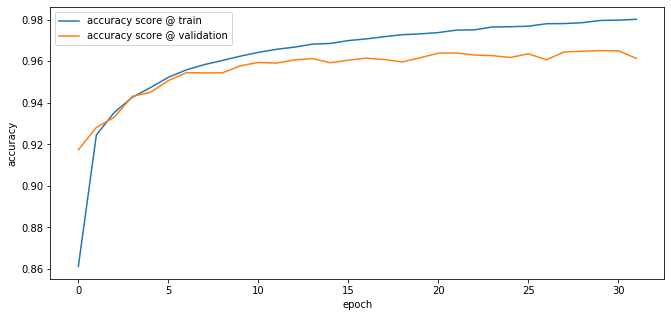

In [0]:
# fitting the simple sequential model on the raw dataset
# with the intention to decrease accuarcy to get the most difficult to trace objects

my_model = fitModel(x_train, y_train, x_test, y_test, [22,0,0,'relu','softmax'], 
                    64, 32, 111, verb=1, to_plot=True)

In [0]:
# predicting & processing target variables
y_pred_ = np.array([np.argmax(i) for i in my_model.predict(x_train)])
y_train_ = np.array([np.argmax(i) for i in y_train])

# collecting the indices of the missed predictions
missed = []
for i in range(y_pred_.shape[0]):
    if y_pred_[i] != y_train_[i]:
        missed.append(i)

# quantifying the error
print(len(missed))
print(len(missed)/y_pred_.shape[0])

# cleaning the dataset from the missed values
x_train_clean = np.delete(x_train, missed, 0)
y_train_clean = np.delete(y_train, missed, 0)
print(x_train.shape, y_train.shape)
print(x_train_clean.shape, y_train_clean.shape)

1072
0.017866666666666666
(60000, 784) (60000, 10)
(58928, 784) (58928, 10)


Train on 58928 samples, validate on 10000 samples
Epoch 1/32
58928/58928 [==============================] - 3s 45us/sample - loss: 0.4163 - acc: 0.8865 - val_loss: 0.2816 - val_acc: 0.9203
Epoch 2/32
58928/58928 [==============================] - 2s 41us/sample - loss: 0.2127 - acc: 0.9372 - val_loss: 0.2384 - val_acc: 0.9315
Epoch 3/32
58928/58928 [==============================] - 2s 41us/sample - loss: 0.1767 - acc: 0.9470 - val_loss: 0.2193 - val_acc: 0.9379
Epoch 4/32
58928/58928 [==============================] - 2s 40us/sample - loss: 0.1522 - acc: 0.9543 - val_loss: 0.2013 - val_acc: 0.9431
Epoch 5/32
58928/58928 [==============================] - 2s 40us/sample - loss: 0.1319 - acc: 0.9602 - val_loss: 0.1843 - val_acc: 0.9464
Epoch 6/32
58928/58928 [==============================] - 3s 43us/sample - loss: 0.1156 - acc: 0.9648 - val_loss: 0.1786 - val_acc: 0.9488
Epoch 7/32
58928/58928 [==============================] - 3s 42us/sample - loss: 0.1033 - acc: 0.9684 - val_loss: 0.

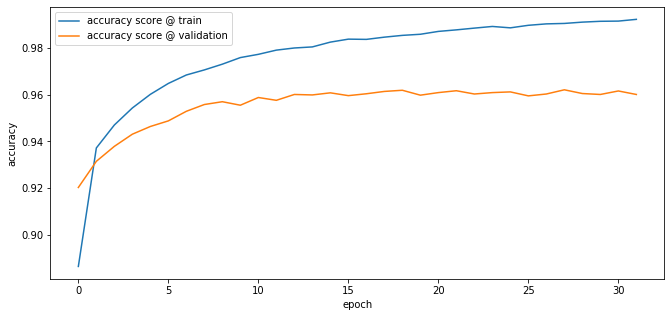

In [0]:
# fit the same nn on the cleaned train and predict for the test dataset

my_model = fitModel(x_train_clean, y_train_clean, x_test, y_test, [22,0,0,'relu','softmax'], 
                    64, 32, 111, verb=1, to_plot=True)

| sample: | train: | test: |
| --- | --- | --- |
| raw | .9802 | .9614 |
|clean | .9922 | .9601 |

Train on 58928 samples, validate on 10000 samples
Epoch 1/128
58928/58928 [==============================] - 3s 46us/sample - loss: 0.1897 - acc: 0.9443 - val_loss: 0.1150 - val_acc: 0.9651
Epoch 2/128
58928/58928 [==============================] - 3s 43us/sample - loss: 0.0598 - acc: 0.9812 - val_loss: 0.1008 - val_acc: 0.9703
Epoch 3/128
58928/58928 [==============================] - 3s 44us/sample - loss: 0.0338 - acc: 0.9898 - val_loss: 0.0849 - val_acc: 0.9752
Epoch 4/128
58928/58928 [==============================] - 2s 42us/sample - loss: 0.0230 - acc: 0.9927 - val_loss: 0.0801 - val_acc: 0.9775
Epoch 5/128
58928/58928 [==============================] - 2s 42us/sample - loss: 0.0162 - acc: 0.9947 - val_loss: 0.0898 - val_acc: 0.9732
Epoch 6/128
58928/58928 [==============================] - 3s 42us/sample - loss: 0.0123 - acc: 0.9961 - val_loss: 0.0975 - val_acc: 0.9753
Epoch 7/128
58928/58928 [==============================] - 2s 42us/sample - loss: 0.0104 - acc: 0.9967 - val_l

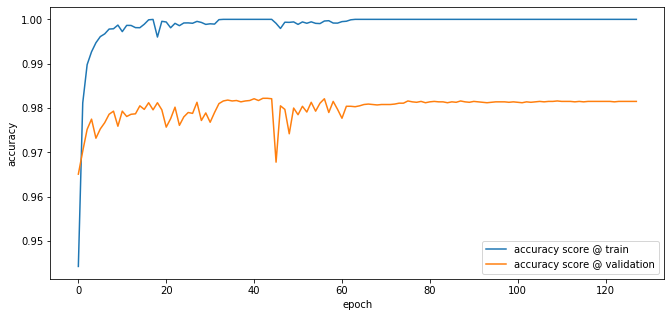

In [0]:
# fit on the cleaned train and predict for the test dataset
# increasing the complexity of the model
my_model = fitModel(x_train_clean, y_train_clean, x_test, y_test, [512,0,0,'relu','softmax'], 
                    64, 128, 112, verb=1, to_plot=True)

| sample: | train: | test: |
| --- | --- | --- |
| raw | .9802 | .9614 |
|clean | .9922 | .9601 |
| complexity_increase_1 | 1 | .9815 |

Train on 58928 samples, validate on 10000 samples
Epoch 1/256
58928/58928 [==============================] - 3s 54us/sample - loss: 0.1632 - acc: 0.9488 - val_loss: 0.1070 - val_acc: 0.9675
Epoch 2/256
58928/58928 [==============================] - 3s 49us/sample - loss: 0.0606 - acc: 0.9812 - val_loss: 0.0863 - val_acc: 0.9743
Epoch 3/256
58928/58928 [==============================] - 3s 50us/sample - loss: 0.0403 - acc: 0.9871 - val_loss: 0.0816 - val_acc: 0.9771
Epoch 4/256
58928/58928 [==============================] - 3s 49us/sample - loss: 0.0330 - acc: 0.9892 - val_loss: 0.1083 - val_acc: 0.9732
Epoch 5/256
58928/58928 [==============================] - 3s 49us/sample - loss: 0.0258 - acc: 0.9919 - val_loss: 0.0906 - val_acc: 0.9779
Epoch 6/256
58928/58928 [==============================] - 3s 49us/sample - loss: 0.0226 - acc: 0.9931 - val_loss: 0.1206 - val_acc: 0.9701
Epoch 7/256
58928/58928 [==============================] - 3s 50us/sample - loss: 0.0196 - acc: 0.9943 - val_l

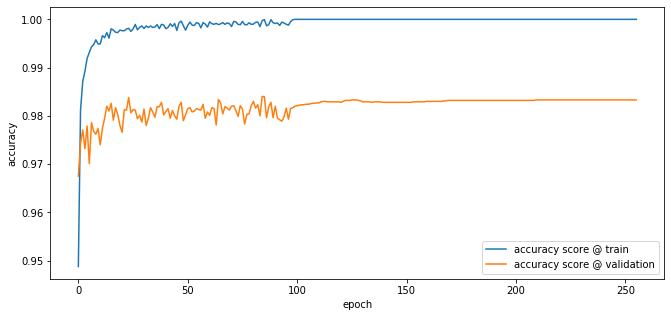

In [0]:
# fit on the cleaned train and predict for the test dataset
# increasing the complexity of the model
my_model = fitModel(x_train_clean, y_train_clean, x_test, y_test, [512,512,512,'relu','softmax'], 
                    64, 256, 113, verb=1, to_plot=True)

| sample: | train: | test: |
| --- | --- | --- |
| raw | .9802 | .9614 |
|clean | .9922 | .9601 |
| complexity_increase_1 | 1 | .9815 |
| complexity_increase_2 | 1 | .9833 |